In [2]:
import pandas as pd

df = pd.read_csv("wetter.csv")

df.head()


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB


In [3]:
df["Temperatur"].mean()


np.float64(12.099585595540177)

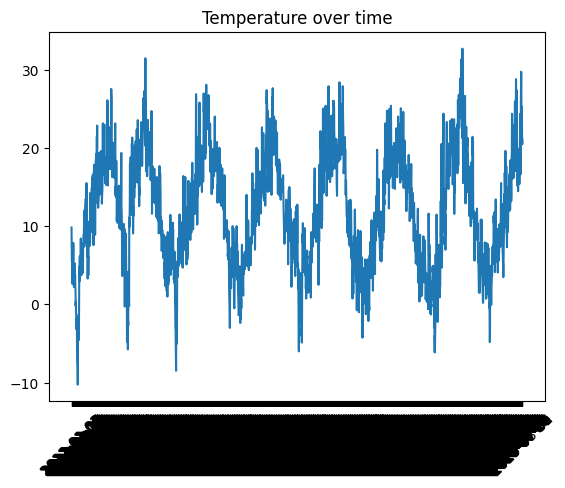

In [4]:
import matplotlib.pyplot as plt

plt.plot(df["Datum"], df["Temperatur"])
plt.xticks(rotation=45)
plt.title("Temperature over time")
plt.show()


In [5]:
df["Datum"] = pd.to_datetime(df["Datum"])
df = df.set_index("Datum")


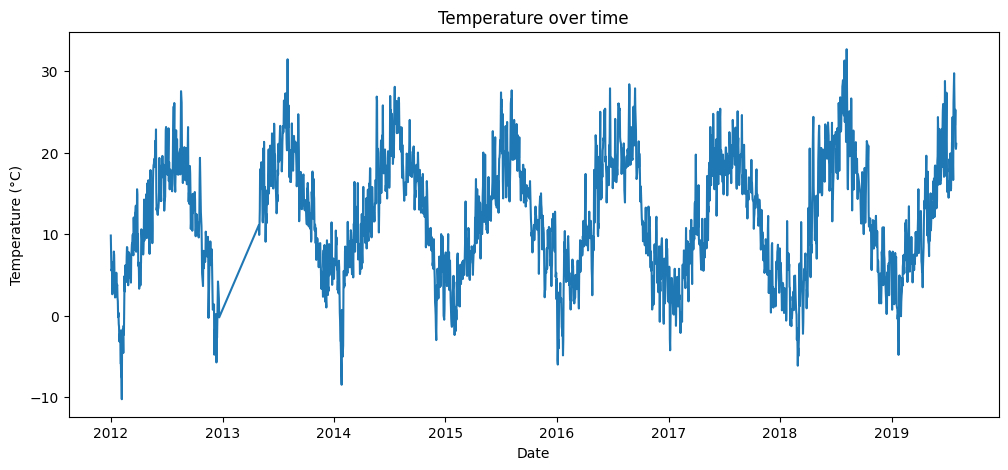

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df["Temperatur"])
plt.title("Temperature over time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [7]:
df["Temperatur"].mean()


np.float64(12.099585595540177)

In [8]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["month"] = df["Datum"].dt.month

df[df["month"] == 7]["Temperatur"].mean()


KeyError: 'Datum'

In [9]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["month"] = df["Datum"].dt.month

july_mean = df.loc[df["month"] == 7, "Temperatur"].mean()
may_mean  = df.loc[df["month"] == 5, "Temperatur"].mean()

july_mean, may_mean


KeyError: 'Datum'

In [10]:
df.columns


Index(['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode'], dtype='object')

In [11]:
df.reset_index(inplace=True)
df["Datum"] = pd.to_datetime(df["Datum"])
df["month"] = df["Datum"].dt.month

july_mean = df[df["month"] == 7]["Temperatur"].mean()
may_mean  = df[df["month"] == 5]["Temperatur"].mean()

july_mean, may_mean


(np.float64(20.75114227125506), np.float64(15.244362036290322))

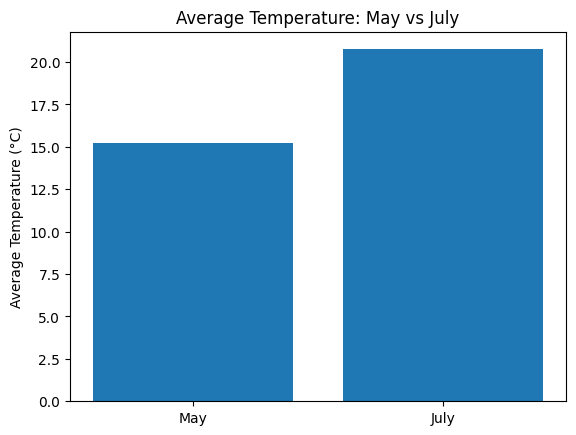

In [12]:
import matplotlib.pyplot as plt

labels = ["May", "July"]
values = [may_mean, july_mean]

plt.bar(labels, values)
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature: May vs July")
plt.show()


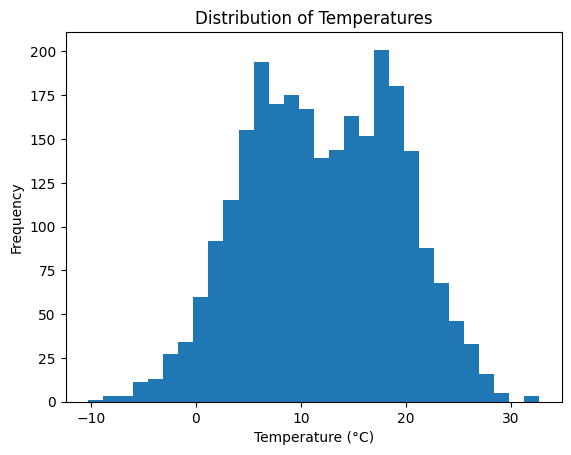

In [13]:
import matplotlib.pyplot as plt

plt.hist(df["Temperatur"], bins=30)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperatures")
plt.show()


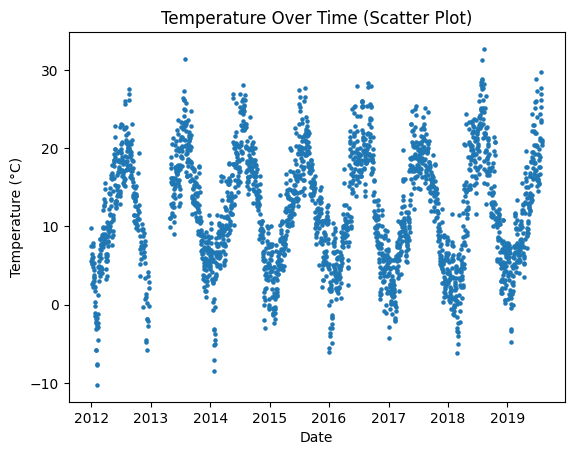

In [14]:
plt.scatter(df["Datum"], df["Temperatur"], s=5)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time (Scatter Plot)")
plt.show()


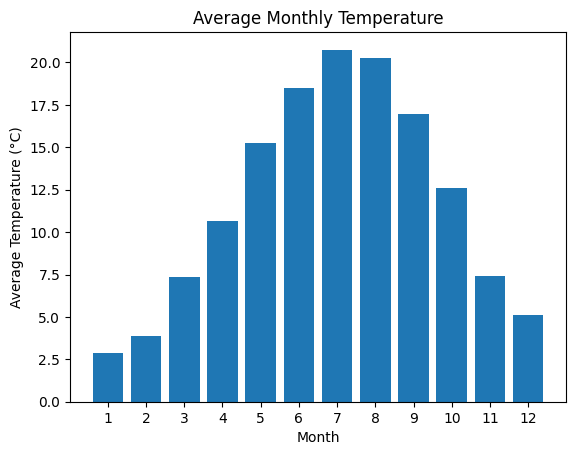

In [15]:
import matplotlib.pyplot as plt

# حساب متوسط الحرارة لكل شهر
monthly_mean = df.groupby(df["Datum"].dt.month)["Temperatur"].mean()

plt.bar(monthly_mean.index, monthly_mean.values)
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Monthly Temperature")
plt.xticks(range(1,13))  # عشان يظهر من 1 ل 12
plt.show()
